In [1]:
import pandas as pd
import seaborn as sns
from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_alcool = pd.read_csv(r'bases_agrupadas\alcool.csv')
df_alimentacao = pd.read_csv(r'bases_agrupadas\alimentacao.csv')
df_exercicio_fisico = pd.read_csv(r'bases_agrupadas\exercicio_fisico.csv')
df_fumo = pd.read_csv(r'bases_agrupadas\fumo.csv')

In [32]:
df_alimentacao.drop(columns = ['Esperança de vida ao nascer (Anos)', 'Situação Censitária','Área', 'Peso Final', 'Altura Final'], inplace = True)
df_exercicio_fisico.drop(columns = ['Esperança de vida ao nascer (Anos)', 'Situação Censitária','Área', 'Peso Final', 'Altura Final'], inplace = True)
df_fumo.drop(columns = ['Esperança de vida ao nascer (Anos)', 'Situação Censitária','Área', 'Peso Final', 'Altura Final'], inplace = True)

In [33]:
df = pd.merge(df_alcool, df_alimentacao, on='id', how='inner')
df = pd.merge(df, df_exercicio_fisico, on='id', how='inner')
# df = pd.merge(df, df_fumo, on='id', how='inner')

In [34]:
df = df.loc[:, ~df.columns.str.startswith('Unnamed:')]

In [35]:
df

,id,Esperança de vida ao nascer (Anos),Situação Censitária,Área,Peso Final,Altura Final,"Em geral, no dia que bebe, quantas doses de bebida alcoólica consome?","Nos últimos doze meses, quando consumiu bebida alcoólica, dirigiu logo depois de beber?","Nos últimos doze meses, algum parente, amigo ou profissional de saúde disse que você estava bebendo demais ou para você parar de beber?",dias_semana_alcool,...,dias_semana_bebida natural,dias_semana_frutas,dias_semana_leite,dias_semana_doces industrializados,Quantos dias por semana costuma praticar exercício físico ou esporte?,Quantos dias por semana faz algum trajeto a pé ou bicicleta?,"Em um dia, quantas horas do seu tempo livre, costuma usar computador, tablet ou celular para lazer?","Perto do seu domicílio, existe algum lugar público (praça, parque, rua fechada, praia) para fazer caminhada, realizar exercício ou praticar esporte?",Conhece algum programa público de estímulo à prática de atividade física no seu município?,Participa desse programa público de estímulo à prática de atividade física no seu município?
0,0,71.91,1,1,60.0,145.0,5.0,NaN,1.0,NaN,...,0.0,3.0,7.0,0.0,1.0,NaN,1.0,1.0,2.0,NaN
1,9,71.91,1,1,65.0,152.0,5.0,2.0,3.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,5.0,1.0,2.0,NaN
2,10,71.91,1,1,77.0,155.0,1.0,NaN,1.0,7.0,...,7.0,7.0,0.0,0.0,NaN,NaN,2.0,2.0,2.0,NaN
3,18,71.91,1,1,56.0,159.0,NaN,NaN,NaN,NaN,...,3.0,3.0,0.0,0.0,3.0,1.0,4.0,1.0,2.0,NaN
4,19,71.91,1,1,55.0,176.0,NaN,NaN,NaN,NaN,...,4.0,3.0,7.0,2.0,1.0,NaN,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90841,293709,78.85,2,1,63.0,168.0,3.0,NaN,1.0,1.0,...,7.0,2.0,0.0,0.0,NaN,NaN,1.0,2.0,2.0,NaN
90842,293712,78.85,2,1,72.0,168.0,12.0,2.0,2.0,2.0,...,2.0,3.0,0.0,0.0,NaN,NaN,4.0,1.0,2.0,NaN
90843,293713,78.85,2,1,87.0,163.0,NaN,NaN,NaN,NaN,...,0.0,1.0,7.0,7.0,1.0,NaN,5.0,2.0,2.0,NaN
90844,293718,78.85,2,1,89.0,168.0,NaN,NaN,NaN,NaN,...,4.0,3.0,0.0,0.0,2.0,NaN,6.0,2.0,1.0,2.0


<Axes: >

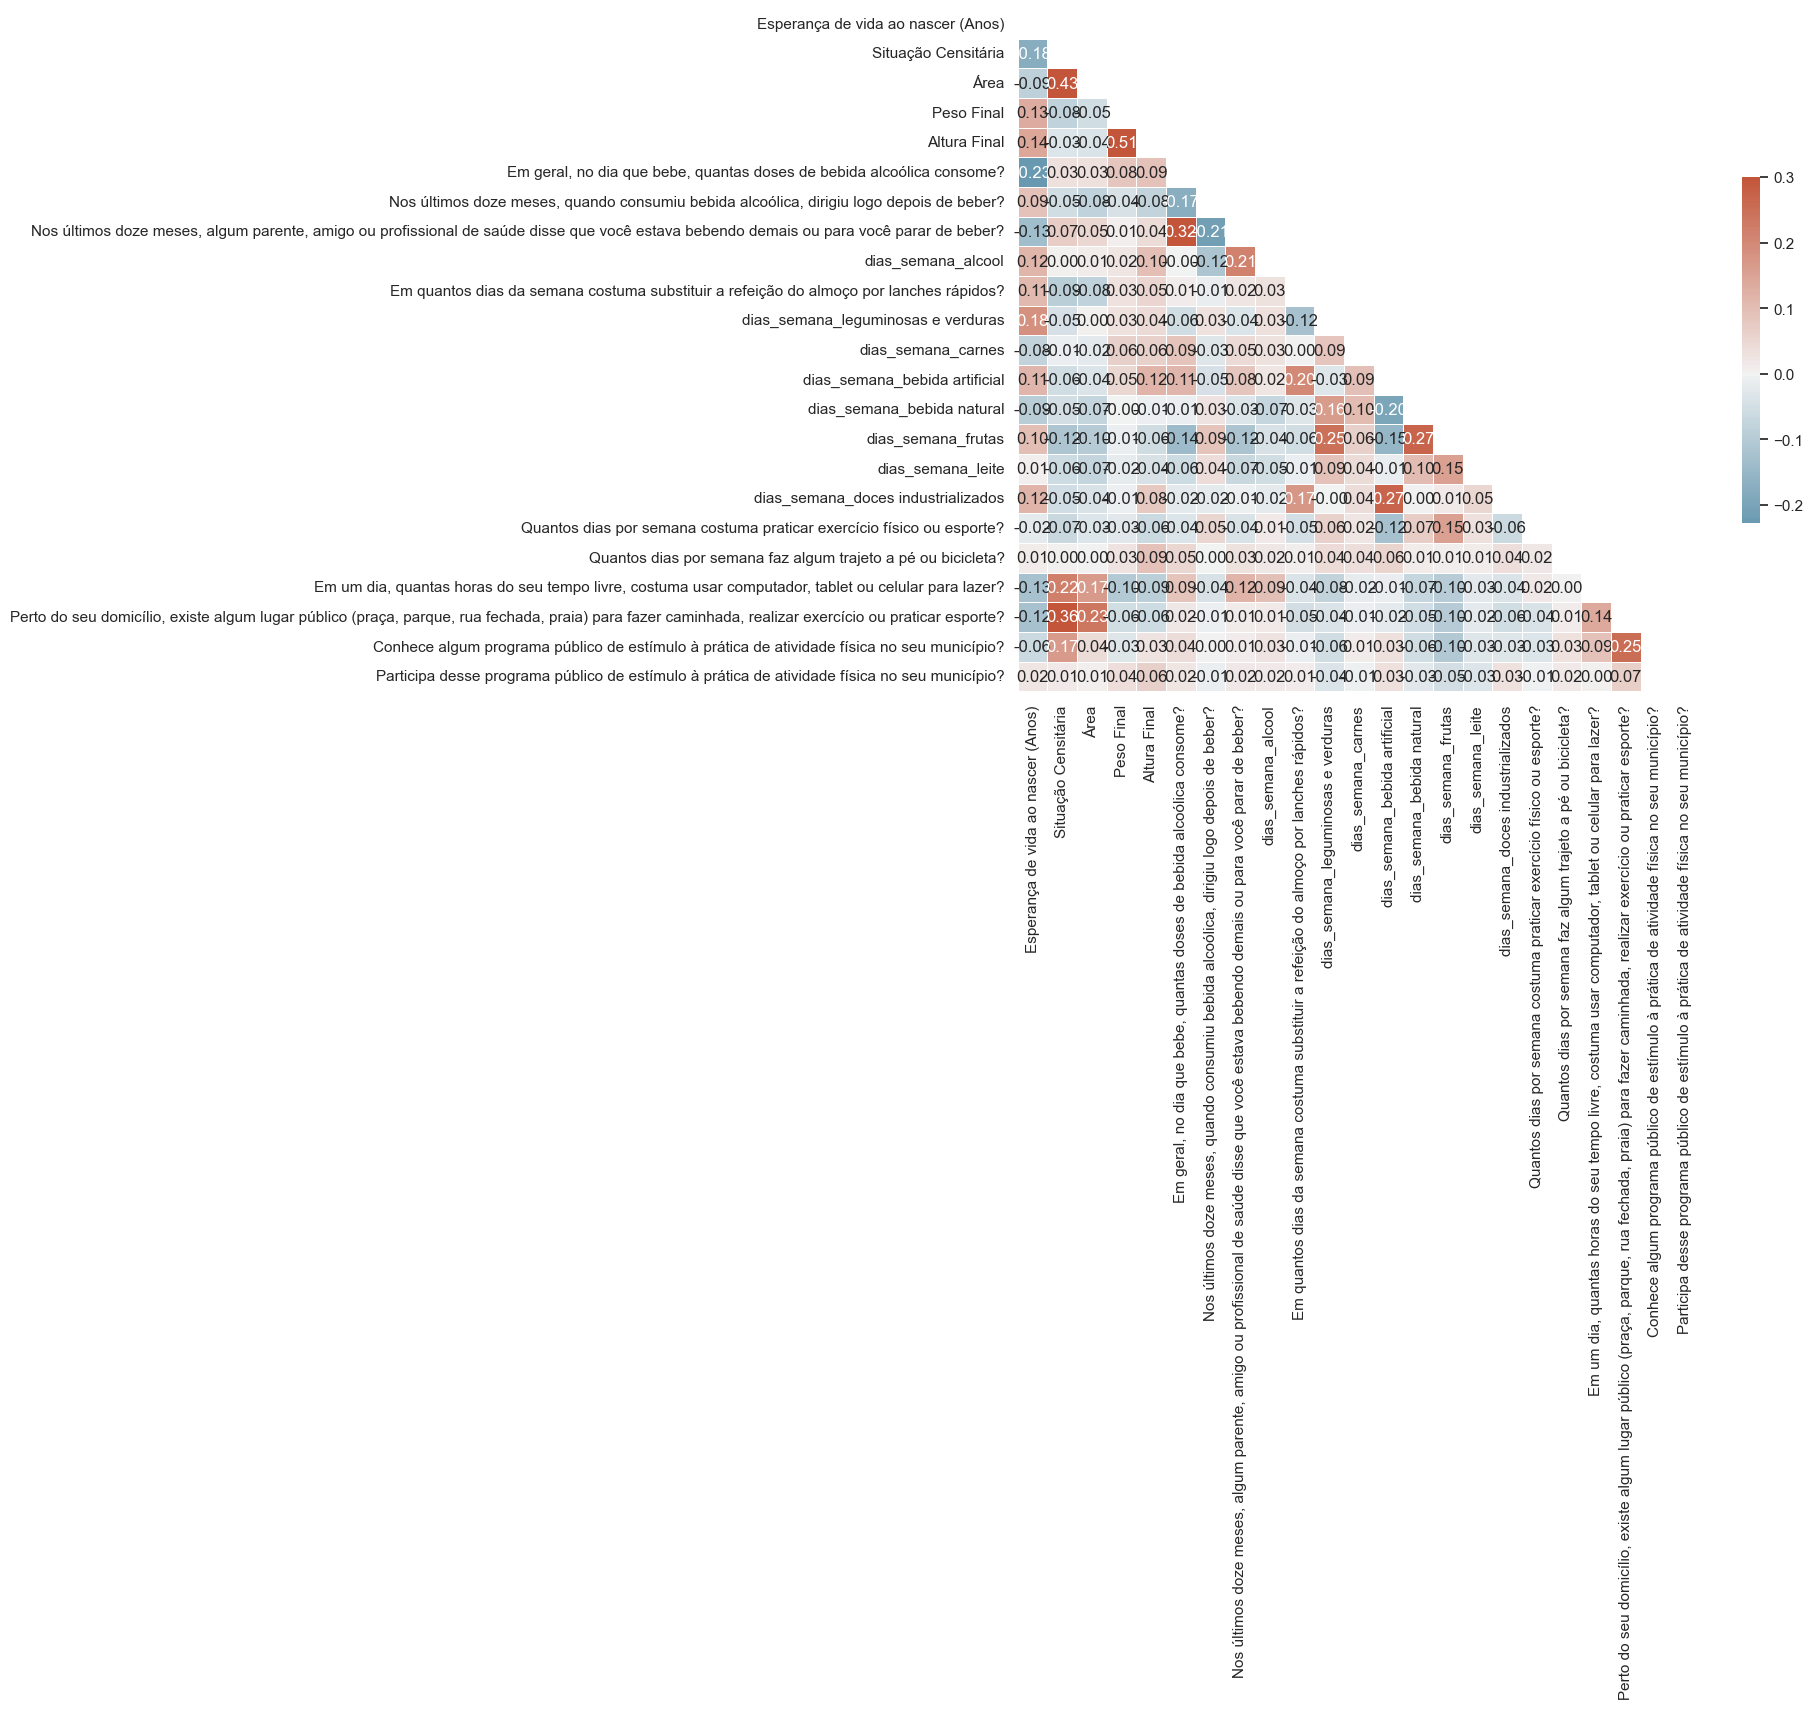

In [36]:
sns.set_theme(style="white")

df.drop(columns = ['id'], inplace = True)
 
# Compute the correlation matrix
corr = df.corr()
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

## Classificação das Unidades Federativas

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.patches import Patch

In [3]:
df_notas_alimentacao = pd.read_csv(r'dados\notas_alimentacao.csv')
df_notas_alcool = pd.read_csv(r'dados\notas_alcool.csv')
df_notas_fumo = pd.read_csv(r'dados\notas_fumo.csv')
df_notas_exercicio = pd.read_csv(r'dados\notas_exercicio.csv')

In [4]:
notas = pd.merge(df_notas_alimentacao, df_notas_alcool, on='UF', how='inner')
notas = pd.merge(notas, df_notas_fumo, on='UF', how='inner')
notas = pd.merge(notas, df_notas_exercicio, on='UF', how='inner')
notas

,UF,almoco_lanche,leguminosas_verdura,carnes,bebida_artificial,bebida_natural,frutas,leite,doces_industrializados,doses_bebida_alcoolica,...,bebendo_demais,dias_semana_alcool,fuma_tabaco,tentou_parar_fumar,nicotina_liquida_folha_tabaco,fumo_em_domicilio,freq_exerc_fisico,tempo_exercicio,trajeto_a_pe_bicicleta,horas_eletronicos
0,RO,4.668033,4.011358,4.580727,3.749536,2.641075,2.260205,3.634183,3.674361,3.195453,...,1.804737,3.390102,4.205213,2.046286,4.354569,1.279006,1.361387,2.241771,4.050406,3.820784
1,AC,4.509650,2.288664,2.481256,2.352282,2.406673,1.388999,3.019086,3.711495,1.000000,...,2.315638,4.651588,4.415160,3.888861,4.887308,3.580986,1.278444,2.985295,3.983864,1.478416
2,AM,3.650834,1.000000,1.000000,2.767605,2.448938,2.190447,4.670741,4.169318,2.062535,...,1.392975,5.000000,2.563061,4.125376,4.946813,1.513507,1.499270,3.664689,1.913386,2.130726
3,RR,4.818380,2.163458,4.168361,3.099625,2.057877,1.000000,3.209197,3.992506,1.258203,...,1.816744,4.495622,3.654029,2.543641,4.775194,4.241519,3.546305,2.890392,4.323862,1.051906
4,PA,4.065898,1.756284,4.411206,4.110769,2.683275,2.398262,1.000000,3.851174,1.920453,...,1.178642,4.936185,2.337123,2.819171,4.959322,2.340323,1.935581,1.769905,2.314090,1.720615
5,AP,4.181964,1.594369,2.290420,1.912337,2.484997,2.312861,2.288052,3.163717,1.393322,...,1.911661,4.772678,1.000000,3.183062,4.787182,2.120370,5.000000,5.000000,4.969115,2.959056
6,TO,3.781442,3.399423,3.597579,2.989319,2.249249,3.148365,4.742823,3.334020,2.348432,...,3.153716,3.124119,4.262512,1.000000,4.492531,4.062827,3.899727,2.208091,3.651702,2.302309
7,MA,4.612651,1.532318,4.536769,4.743436,1.711451,2.163790,4.865290,5.000000,2.062661,...,1.540531,4.750745,3.636062,3.154728,4.987426,3.428004,2.995871,1.240585,1.886719,1.380366
8,PI,5.000000,2.823831,2.277317,4.565630,2.428996,2.652798,3.324577,4.432785,3.043554,...,1.947362,4.890722,3.596529,4.382421,4.175757,3.499703,3.427428,1.413759,1.235339,2.696712
9,CE,3.834212,2.848291,1.008800,3.732596,3.077843,3.128814,4.220707,2.385024,2.615885,...,1.104682,4.484329,4.368199,4.693950,4.812886,4.555307,4.579523,1.000000,2.667918,1.000000


In [5]:
# Carrega o DataFrame
ufs = notas['UF']
X = notas.drop(columns=['UF'])

# Normaliza os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

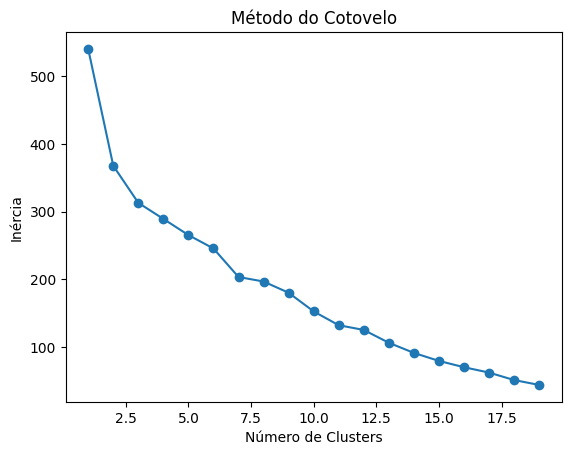

In [6]:
# Descobrindo o número ideal de clusters com o método do cotovelo
inertia = []
for k in range(1, 20):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

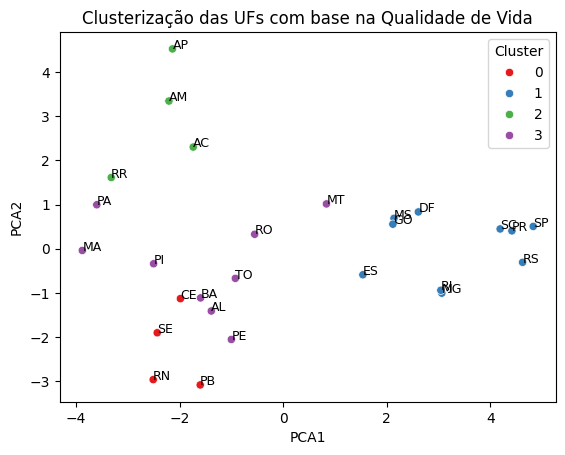

In [7]:
# Ajusta o K-means
kmeans = KMeans(n_clusters=4, random_state=42)
notas['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualização com PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
notas['PCA1'] = X_pca[:, 0]
notas['PCA2'] = X_pca[:, 1]

sns.scatterplot(data=notas, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
for i, txt in enumerate(notas['UF']):
    plt.text(notas['PCA1'][i], notas['PCA2'][i], txt, fontsize=9)
plt.title('Clusterização das UFs com base na Qualidade de Vida')
plt.show()


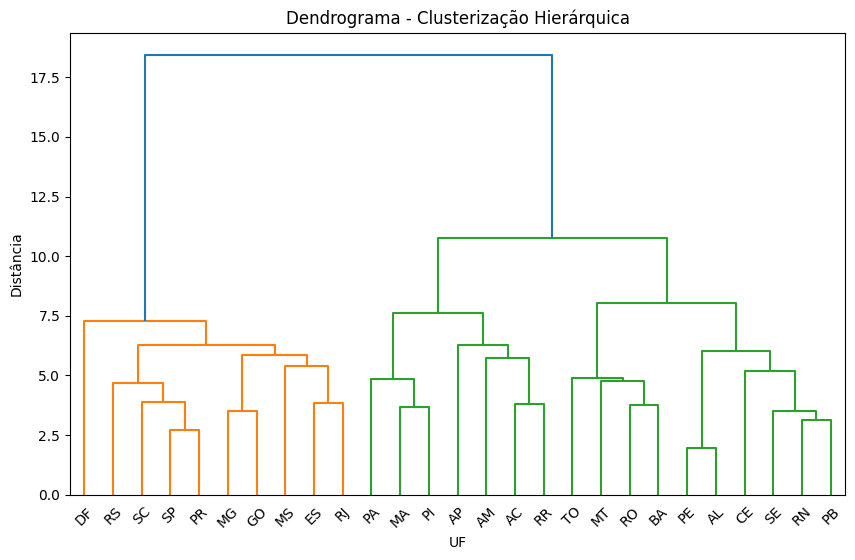

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Criar linkage matrix
linked = linkage(X_scaled, method='ward')

# Dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linked, labels=ufs.values, orientation='top', distance_sort='ascending')
plt.title('Dendrograma - Clusterização Hierárquica')
plt.xlabel('UF')
plt.ylabel('Distância')
# plt.savefig('imagens/cluster_hierarquico.pdf', transparent = True)
plt.show()

# Definir número de clusters com corte no dendrograma
clusters_hier = fcluster(linked, t=4, criterion='maxclust') 
notas['Cluster_Hierarquico'] = clusters_hier

In [9]:
notas

,UF,almoco_lanche,leguminosas_verdura,carnes,bebida_artificial,bebida_natural,frutas,leite,doces_industrializados,doses_bebida_alcoolica,...,nicotina_liquida_folha_tabaco,fumo_em_domicilio,freq_exerc_fisico,tempo_exercicio,trajeto_a_pe_bicicleta,horas_eletronicos,Cluster,PCA1,PCA2,Cluster_Hierarquico
0,RO,4.668033,4.011358,4.580727,3.749536,2.641075,2.260205,3.634183,3.674361,3.195453,...,4.354569,1.279006,1.361387,2.241771,4.050406,3.820784,3,-0.552056,0.327189,3
1,AC,4.509650,2.288664,2.481256,2.352282,2.406673,1.388999,3.019086,3.711495,1.000000,...,4.887308,3.580986,1.278444,2.985295,3.983864,1.478416,2,-1.738698,2.299908,2
2,AM,3.650834,1.000000,1.000000,2.767605,2.448938,2.190447,4.670741,4.169318,2.062535,...,4.946813,1.513507,1.499270,3.664689,1.913386,2.130726,2,-2.207380,3.341073,2
3,RR,4.818380,2.163458,4.168361,3.099625,2.057877,1.000000,3.209197,3.992506,1.258203,...,4.775194,4.241519,3.546305,2.890392,4.323862,1.051906,2,-3.321221,1.609923,2
4,PA,4.065898,1.756284,4.411206,4.110769,2.683275,2.398262,1.000000,3.851174,1.920453,...,4.959322,2.340323,1.935581,1.769905,2.314090,1.720615,3,-3.600073,0.994360,2
5,AP,4.181964,1.594369,2.290420,1.912337,2.484997,2.312861,2.288052,3.163717,1.393322,...,4.787182,2.120370,5.000000,5.000000,4.969115,2.959056,2,-2.138948,4.520068,2
6,TO,3.781442,3.399423,3.597579,2.989319,2.249249,3.148365,4.742823,3.334020,2.348432,...,4.492531,4.062827,3.899727,2.208091,3.651702,2.302309,3,-0.925123,-0.670260,3
7,MA,4.612651,1.532318,4.536769,4.743436,1.711451,2.163790,4.865290,5.000000,2.062661,...,4.987426,3.428004,2.995871,1.240585,1.886719,1.380366,3,-3.879552,-0.038954,2
8,PI,5.000000,2.823831,2.277317,4.565630,2.428996,2.652798,3.324577,4.432785,3.043554,...,4.175757,3.499703,3.427428,1.413759,1.235339,2.696712,3,-2.502710,-0.339749,2
9,CE,3.834212,2.848291,1.008800,3.732596,3.077843,3.128814,4.220707,2.385024,2.615885,...,4.812886,4.555307,4.579523,1.000000,2.667918,1.000000,0,-1.985351,-1.128911,4


In [10]:
# Selecionando as features principais para a criação dos boxplots com base nos centroides
features = ['leguminosas_verdura', 'bebida_artificial', 'bebida_natural', 'doces_industrializados', 'doses_bebida_alcoolica', 'dias_semana_alcool', 'fuma_tabaco', 'nicotina_liquida_folha_tabaco', 'freq_exerc_fisico', 'tempo_exercicio', 'horas_eletronicos']

# Calculando os centroides para cada cluster
centroides = notas.groupby('Cluster_Hierarquico')[features].mean()
centroides

,leguminosas_verdura,bebida_artificial,bebida_natural,doces_industrializados,doses_bebida_alcoolica,dias_semana_alcool,fuma_tabaco,nicotina_liquida_folha_tabaco,freq_exerc_fisico,tempo_exercicio,horas_eletronicos
Cluster_Hierarquico,,,,,,,,,,,
1,3.963182,2.082729,1.666490,1.850857,4.062221,2.121655,4.543282,3.409290,2.651367,2.760808,3.887467
2,1.879846,3.364527,2.317458,4.045856,1.820104,4.785363,3.028852,4.788429,2.811843,2.709232,1.916828
3,3.695357,3.415650,2.696789,3.319948,2.860049,2.964522,4.142100,4.423260,3.033108,2.180663,3.312293
4,3.529427,4.048912,3.788241,2.935835,2.532724,4.245873,4.533453,4.849293,4.165480,1.493542,2.132816


In [11]:
# Renomeando as colunas para a visualização
rename_dict = {
    'leguminosas_verdura': 'Consumo de Leguminosas e Verduras',
    'bebida_artificial': 'Consumo de Bebidas Artificiais',
    'bebida_natural': 'Consumo de Bebidas Naturais',
    'doces_industrializados': 'Consumo de Doces Industrializados',
    'doses_bebida_alcoolica': 'Consumo de Bebidas Alcoólicas',
    'dias_semana_alcool': 'Frequência de Consumo de Bebidas Alcoólicas',
    'fuma_tabaco': 'Fumante',
    'nicotina_liquida_folha_tabaco': 'Consumo de Nicotina',
    'freq_exerc_fisico': 'Frequência de Prática de Exercício Físico',
    'tempo_exercicio': 'Tempo da Prática de Exercício Físico',
    'horas_eletronicos': 'Tempo em Eletrônicos'
}

C:\Users\ra00319067\AppData\Local\Temp\ipykernel_8356\3122405980.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ra00319067\AppData\Local\Temp\ipykernel_8356\3122405980.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ra00319067\AppData\Local\Temp\ipykernel_8356\3122405980.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ra00319067\AppData\Local\Temp\ipykernel_8356\3122405980.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x

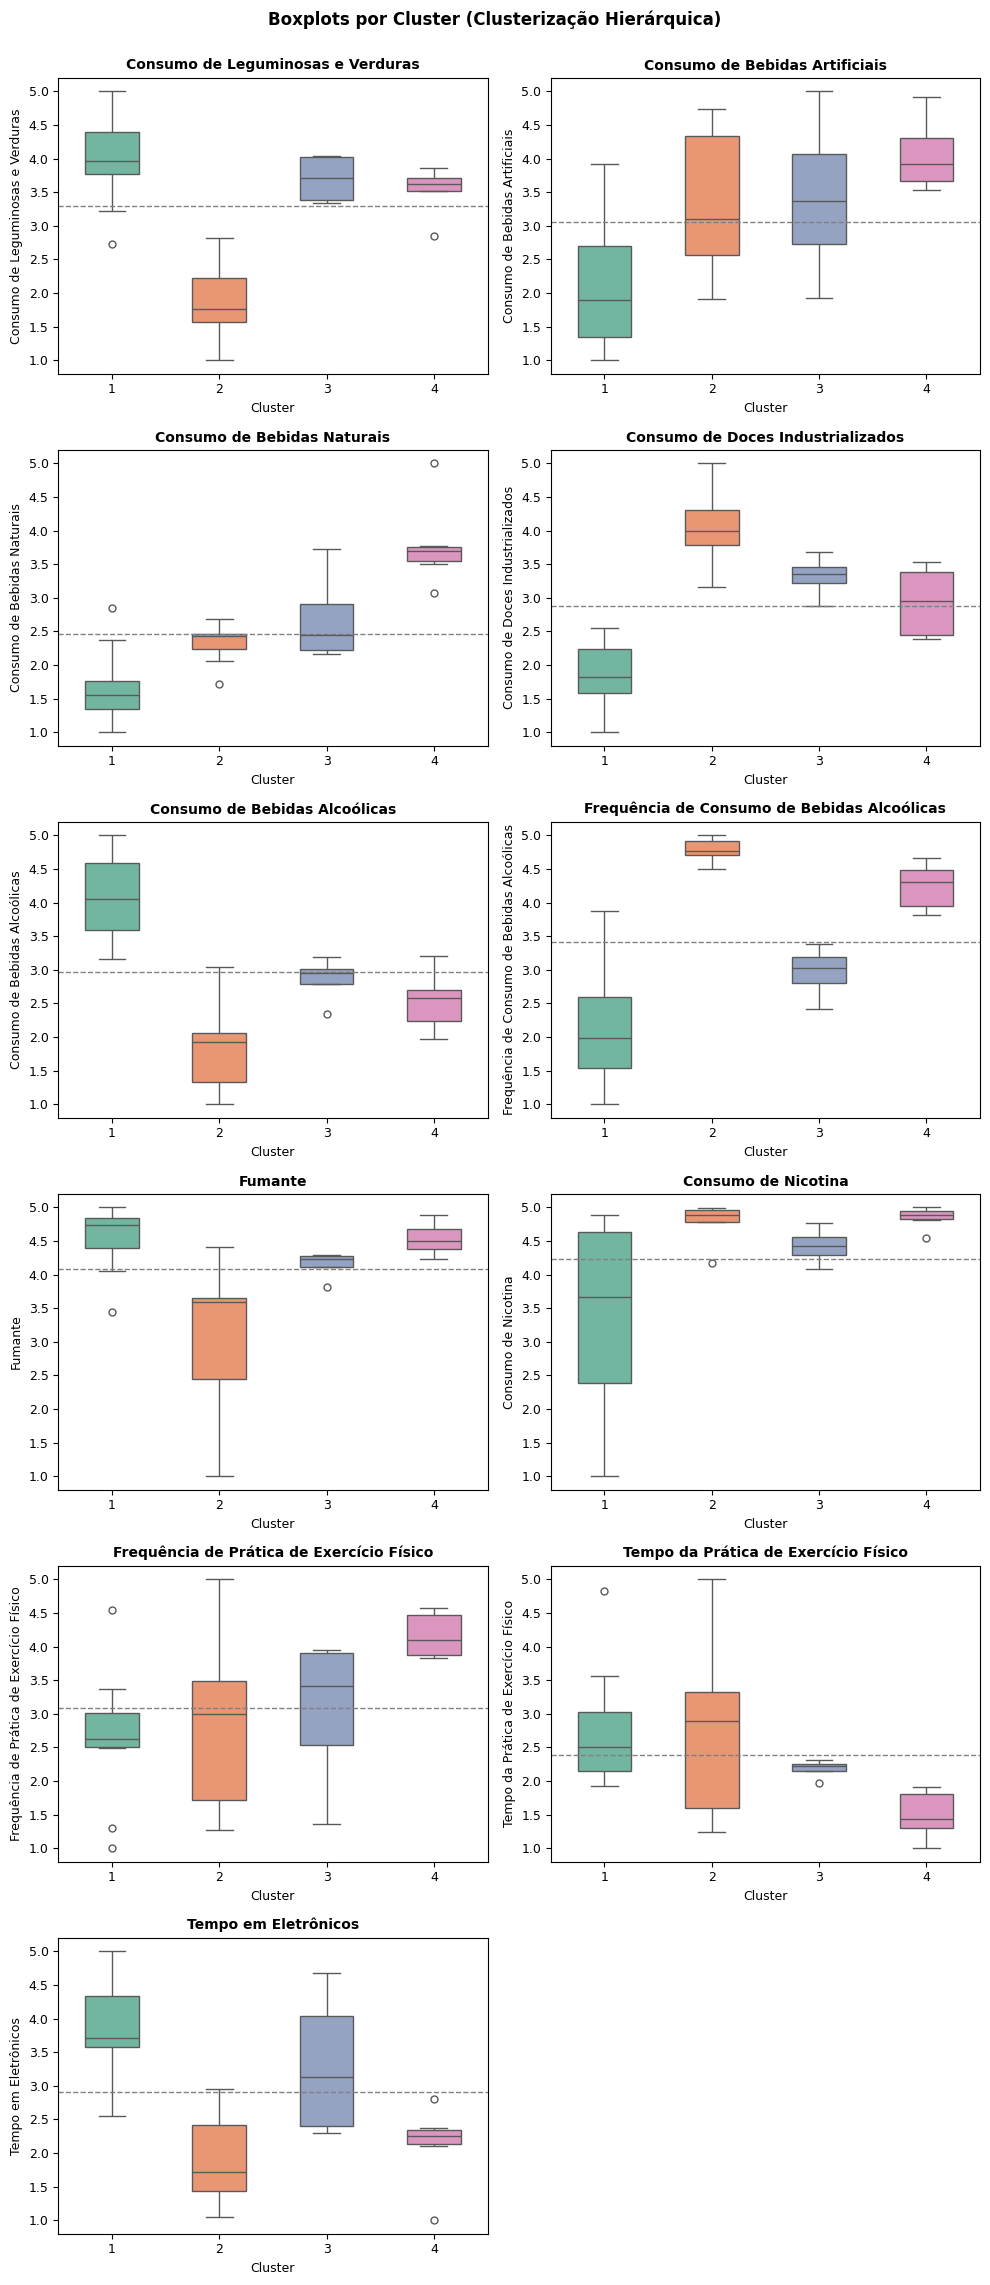

In [12]:
# Número de features e organização do grid (ex: 4 linhas x 3 colunas)
n = len(features)
rows = 6
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(
        data=notas, 
        x='Cluster_Hierarquico', 
        y=feature, 
        palette='Set2', 
        width=0.5, 
        fliersize=5, 
        ax=ax
    )

    ax.set_title(f'{rename_dict.get(feature, feature)}', fontsize=10, fontweight='bold')
    ax.set_xlabel('Cluster', fontsize=9)
    ax.set_ylabel(rename_dict.get(feature, feature), fontsize=9)
    ax.tick_params(axis='both', labelsize=9)
    ax.axhline(notas[feature].mean(), color='gray', linestyle='--', linewidth=1)  # linha da média

# Remove subplots extras (caso haja)
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

# Ajusta layout e título geral
fig.suptitle('Boxplots por Cluster (Clusterização Hierárquica)', fontsize=12, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# plt.savefig('imagens/boxplot_cluster.pdf', transparent = True)
plt.show()

In [13]:
df_expectativa_vida = pd.read_excel(r'dicionários\esperanca_vida_ao_nascer.xlsx', sheet_name = 'Sheet1')
df_expectativa_vida

,Unidade da Federação,UF,Esperança de vida ao nascer (Anos)
0,Rondônia,RO,71.91
1,Acre,AC,74.83
2,Amazonas,AM,72.59
3,Roraima,RR,72.41
4,Pará,PA,72.66
5,Amapá,AP,74.66
6,Tocantins,TO,74.15
7,Maranhão,MA,71.41
8,Piauí,PI,71.59
9,Ceará,CE,74.48


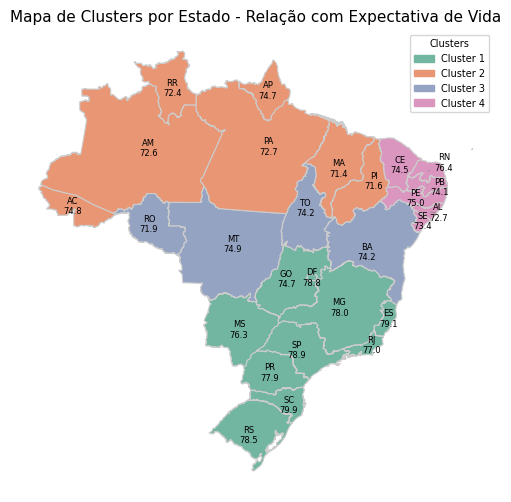

In [17]:
# Mesmas cores dos boxplots
cores = {
    1: '#72b6a1',  # verde - cluster 1
    2: '#e99675',  # laranja - cluster 2
    3: '#95a3c3',   # azul - cluster 3
    4: '#db96c0'   # rosa - cluster 4
}

# URL com os estados brasileiros em GeoJSON
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'

# Lê o shapefile diretamente da internet
estados = gpd.read_file(url)
estados = estados.rename(columns={'sigla': 'UF'})

# Merge do shapefile com os clusters
brasil = estados.merge(notas, on='UF')
brasil = brasil.merge(df_expectativa_vida, on='UF')

# Adicionando coluna de cor com base no cluster
brasil['cor'] = brasil['Cluster_Hierarquico'].map(cores)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
brasil.plot(color=brasil['cor'], linewidth=0.8, edgecolor='0.8', ax=ax)

handles = [Patch(color=cor, label=f'Cluster {k}') for k, cor in cores.items()]
ax.legend(handles=handles, title='Clusters', fontsize = 7, title_fontsize = 7)

ax.set_title('Mapa de Clusters por Estado - Relação com Expectativa de Vida', fontsize=11)
ax.axis('off')

# Adicionar texto com sigla e expectativa de vida em cada estado
for idx, row in brasil.iterrows():
    uf = row['UF']
    expectativa = row['Esperança de vida ao nascer (Anos)']
    ponto = row.geometry.representative_point()
    x = ponto.x
    y = ponto.y
    if uf in ['RN', 'PB', 'AL']:
        # Define nova posição fora do estado
        offset = {
            'RN': (x + 1.5, y + 0.8),
            'PB': (x + 1.2, y - 0.2),
            'AL': (x + 1.0, y - 0.1),
        }
        x_text, y_text = offset[uf]
        ax.annotate(f'{uf}\n{expectativa:.1f}', xy=(x, y), xytext=(x_text, y_text),
                    fontsize=6, ha='center', va='center',
                    arrowprops=dict(arrowstyle='-', lw=0.5, color='gray'))
    else:
        # Texto normal
        ax.text(x, y, f'{uf}\n{expectativa:.1f}', fontsize=6, ha='center', va='center')
# plt.savefig('imagens/mapa_cluster_uf.pdf', transparent = True)
plt.show()